<a href="https://colab.research.google.com/github/mauricioquezada/funtions-infocafe/blob/main/cafeinforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Se cargo la data de exportaciones tipo variedad de cafe , de sitio https://federaciondecafeteros.org/wp/estadisticas-cafeteras/

In [12]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import storage
client = storage.Client()
bucket = client.get_bucket('cafeprueba')
blob = bucket.blob('PCAFE.xlsx')
blob.download_to_filename('PCAFE.xlsx')
import pandas as pd
df = pd.read_excel('PCAFE.xlsx')
df.head()




,Fecha,Precio Interno ($/125 Kg),Mes,Precio interno,Año,Mes.1,País de destino,Tipo de café,Sacos de 70 kg. equivalente real Exportados,Sacos de 60 Kg. Exportados,...,2014*,2015*,2016*,2017*,2018*,2019*,2020*,2021*,2022*,2023*
0,2003-01-02,277000.0,1944-01-01,44.0,2017,1,Alemania,Café Verde,64522,75275,...,130.9944,128.62959,126.3959,123.25658,120.96247,119.15522,117.53160,116.29093,114.33204,111.83099
1,2003-01-03,280875.0,1944-02-01,44.0,2017,1,Alemania,Extractos,1,1,...,n/d,n/d,n/d,n/d,n/d,n/d,0.10895,0.10941,0.11047,0.11070
2,2003-01-04,280875.0,1944-03-01,47.0,2017,1,Alemania,Soluble,9132,10650,...,1.11661,1.15858,1.18293,1.23128,1.31422,1.38602,1.39711,1.40372,1.42608,1.49154
3,2003-01-05,280875.0,1944-04-01,47.0,2017,1,Alemania,Tostados,3,3,...,11.40843,11.52441,11.44544,10.56771,10.41157,10.25207,10.14108,10.23627,10.59641,10.64538
4,2003-01-06,281500.0,1944-05-01,47.0,2017,1,Argentina,Café Verde,1415,1650,...,74.52824,72.36568,70.78863,68.96862,66.01964,63.05112,60.82137,59.28176,59.05821,58.20039


In [ ]:
from google.cloud import storage

client = storage.Client()
bucket = client.get_bucket('cafeprueba')

# Listar los archivos en el bucket
blobs = bucket.list_blobs()

for blob in blobs:
    print(blob.name)

Exportaciones.xlsx


#Se filtra los datos por las variables de interés: calidad, variedad, país y precio.
# Se  empiza a revisar la estructura de los datos que contanga puntos, esten repetidos(limpieza preliminar , observatoria)

In [ ]:
import pandas as pd
df = pd.read_excel('PCAFE.xlsx')

print(df.head())

       Fecha  Precio Interno ($/125 Kg)        Mes  Precio interno   Año  \
0 2003-01-02                   277000.0 1944-01-01            44.0  2017   
1 2003-01-03                   280875.0 1944-02-01            44.0  2017   
2 2003-01-04                   280875.0 1944-03-01            47.0  2017   
3 2003-01-05                   280875.0 1944-04-01            47.0  2017   
4 2003-01-06                   281500.0 1944-05-01            47.0  2017   

   Mes.1 País de destino Tipo de café  \
0      1        Alemania   Café Verde   
1      1        Alemania    Extractos   
2      1        Alemania      Soluble   
3      1        Alemania     Tostados   
4      1       Argentina   Café Verde   

   Sacos de 70 kg. equivalente real Exportados  Sacos de 60 Kg. Exportados  \
0                                        64522                       75275   
1                                            1                           1   
2                                         9132                

In [ ]:
import pandas as pd
df = pd.read_excel('PCAFE.xlsx')

print(df.head())
df = df.drop_duplicates()
df = df.dropna()
print(df.columns)


       Fecha  Precio Interno ($/125 Kg)        Mes  Precio interno   Año  \
0 2003-01-02                   277000.0 1944-01-01            44.0  2017   
1 2003-01-03                   280875.0 1944-02-01            44.0  2017   
2 2003-01-04                   280875.0 1944-03-01            47.0  2017   
3 2003-01-05                   280875.0 1944-04-01            47.0  2017   
4 2003-01-06                   281500.0 1944-05-01            47.0  2017   

   Mes.1 País de destino Tipo de café  \
0      1        Alemania   Café Verde   
1      1        Alemania    Extractos   
2      1        Alemania      Soluble   
3      1        Alemania     Tostados   
4      1       Argentina   Café Verde   

   Sacos de 70 kg. equivalente real Exportados  Sacos de 60 Kg. Exportados  \
0                                        64522                       75275   
1                                            1                           1   
2                                         9132                

In [ ]:
import pandas as pd
df = pd.read_excel('PCAFE.xlsx')
print(df.dtypes)
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df['Precio Interno ($/125 Kg)'] = pd.to_numeric(df['Precio Interno ($/125 Kg)'], errors='coerce')
df['Sacos de 70 kg. equivalente real Exportados'] = pd.to_numeric(df['Sacos de 70 kg. equivalente real Exportados'], errors='coerce')
df['Sacos de 60 Kg. Exportados'] = pd.to_numeric(df['Sacos de 60 Kg. Exportados'], errors='coerce')
print(df.dtypes)


Fecha                        datetime64[ns]
Precio Interno ($/125 Kg)           float64
Mes                          datetime64[ns]
Precio interno                      float64
Año                                   int64
                                  ...      
2019*                                object
2020*                               float64
2021*                               float64
2022*                               float64
2023*                               float64
Length: 103, dtype: object
Fecha                        datetime64[ns]
Precio Interno ($/125 Kg)           float64
Mes                          datetime64[ns]
Precio interno                      float64
Año                                   int64
                                  ...      
2019*                                object
2020*                               float64
2021*                               float64
2022*                               float64
2023*                               float64
Lengt

In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo Excel
df = pd.read_excel('PCAFE.xlsx')

# Renombrar columnas con nombres largos para simplificar
df.rename(columns={'Precio Interno ($/125 Kg)': 'Precio Interno',
                   'Sacos de 70 kg. equivalente real Exportados': 'Sacos 70 kg Exportados',
                   'Sacos de 60 Kg. Exportados': 'Sacos 60 kg Exportados'}, inplace=True)

# Verifica las columnas del DataFrame
print(df.columns)

# Verifica los valores únicos de la columna 'Mes'
print(df['Mes'].unique())

Index([                 'Fecha',         'Precio Interno',
                          'Mes',         'Precio interno',
                          'Año',                  'Mes.1',
              'País de destino',           'Tipo de café',
       'Sacos 70 kg Exportados', 'Sacos 60 kg Exportados',
       ...
                        '2014*',                  '2015*',
                        '2016*',                  '2017*',
                        '2018*',                  '2019*',
                        '2020*',                  '2021*',
                        '2022*',                  '2023*'],
      dtype='object', length=103)
<DatetimeArray>
['1944-01-01 00:00:00', '1944-02-01 00:00:00', '1944-03-01 00:00:00',
 '1944-04-01 00:00:00', '1944-05-01 00:00:00', '1944-06-01 00:00:00',
 '1944-07-01 00:00:00', '1944-08-01 00:00:00', '1944-09-01 00:00:00',
 '1944-10-01 00:00:00',
 ...
 '2024-01-01 00:00:00', '2024-02-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import storage
client = storage.Client()
bucket = client.get_bucket('cafeprueba')
blob = bucket.blob('PCAFE.xlsx')
blob.download_to_filename('PCAFE.xlsx')
import pandas as pd
df = pd.read_excel('PCAFE.xlsx')
df.head()

,Fecha,Precio Interno ($/125 Kg),Mes,Precio interno,Año,Mes.1,País de destino,Tipo de café,Sacos de 70 kg. equivalente real Exportados,Sacos de 60 Kg. Exportados,...,2014*,2015*,2016*,2017*,2018*,2019*,2020*,2021*,2022*,2023*
0,2003-01-02,277000.0,1944-01-01,44.0,2017,1,Alemania,Café Verde,64522,75275,...,130.9944,128.62959,126.3959,123.25658,120.96247,119.15522,117.53160,116.29093,114.33204,111.83099
1,2003-01-03,280875.0,1944-02-01,44.0,2017,1,Alemania,Extractos,1,1,...,n/d,n/d,n/d,n/d,n/d,n/d,0.10895,0.10941,0.11047,0.11070
2,2003-01-04,280875.0,1944-03-01,47.0,2017,1,Alemania,Soluble,9132,10650,...,1.11661,1.15858,1.18293,1.23128,1.31422,1.38602,1.39711,1.40372,1.42608,1.49154
3,2003-01-05,280875.0,1944-04-01,47.0,2017,1,Alemania,Tostados,3,3,...,11.40843,11.52441,11.44544,10.56771,10.41157,10.25207,10.14108,10.23627,10.59641,10.64538
4,2003-01-06,281500.0,1944-05-01,47.0,2017,1,Argentina,Café Verde,1415,1650,...,74.52824,72.36568,70.78863,68.96862,66.01964,63.05112,60.82137,59.28176,59.05821,58.20039


In [ ]:
import pandas as pd
import numpy as np

# Read the Excel file and parse dates
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])

# Display the first few rows of the dataframe
print(df.head())

# Display unique values in the 'Mes' column
print(df['Mes'].unique())

# Filter out rows where the year is 1944
df = df[df['Fecha'].dt.year != 1944]

# Extract the month from the 'Fecha' column
df['Mes'] = df['Fecha'].dt.month

# Drop the original 'Mes' column if it exists
if 'Mes' in df.columns:
    df = df.drop(columns=['Mes'])

# Ensure 'Fecha' column is in datetime format
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Display the first few rows of the cleaned dataframe
print(df.head())


       Fecha  Precio Interno ($/125 Kg)        Mes  Precio interno   Año  \
0 2003-01-02                   277000.0 1944-01-01            44.0  2017   
1 2003-01-03                   280875.0 1944-02-01            44.0  2017   
2 2003-01-04                   280875.0 1944-03-01            47.0  2017   
3 2003-01-05                   280875.0 1944-04-01            47.0  2017   
4 2003-01-06                   281500.0 1944-05-01            47.0  2017   

   Mes.1 País de destino Tipo de café  \
0      1        Alemania   Café Verde   
1      1        Alemania    Extractos   
2      1        Alemania      Soluble   
3      1        Alemania     Tostados   
4      1       Argentina   Café Verde   

   Sacos de 70 kg. equivalente real Exportados  Sacos de 60 Kg. Exportados  \
0                                        64522                       75275   
1                                            1                           1   
2                                         9132                

In [ ]:
import pandas as pd
import numpy as np
print(df.columns)


Index([                                      'Fecha',
                         'Precio Interno ($/125 Kg)',
                                    'Precio interno',
                                               'Año',
                                             'Mes.1',
                                   'País de destino',
                                      'Tipo de café',
       'Sacos de 70 kg. equivalente real Exportados',
                        'Sacos de 60 Kg. Exportados',
       'Valor provisional de la Exportación (USD) *',
       ...
                                             '2014*',
                                             '2015*',
                                             '2016*',
                                             '2017*',
                                             '2018*',
                                             '2019*',
                                             '2020*',
                                             '2021*',
                 

In [ ]:
import pandas as pd
import numpy as np
print("Columnas iniciales:", df.columns)                                         # Verificar las columnas antes de cualquier modificación
if 'Fecha' in df.columns:                                                        # Si la columna 'Fecha' existe y está en formato datetime, Se crea la columna 'Mes'
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')                   #  'Fecha' esté en formato datetime
    df['Mes'] = df['Fecha'].dt.month                                            # Crear la columna 'Mes' a partir de 'Fecha'
    print("Columna 'Mes' creada exitosamente.")
else:
    print("La columna 'Fecha' no existe en el DataFrame.")
print("Columnas actuales:", df.columns)                                           # Verificar nuevamente las columnas
columns_to_clean = [col for col in df.columns if isinstance(col, str) and '*' in col]        # Limpiar las columnas que contienen '*' en el nombre
df[columns_to_clean] = df[columns_to_clean].replace('n/d', np.nan).infer_objects(copy=False).astype(float)      #Se Reemplazo 'n/d' por NaN y se convertio a tipo float
print(df[columns_to_clean].isnull().sum())                                       # Imprimir la cantidad de valores nulos por columna

Columnas iniciales: Index([                                      'Fecha',
                         'Precio Interno ($/125 Kg)',
                                    'Precio interno',
                                               'Año',
                                             'Mes.1',
                                   'País de destino',
                                      'Tipo de café',
       'Sacos de 70 kg. equivalente real Exportados',
                        'Sacos de 60 Kg. Exportados',
       'Valor provisional de la Exportación (USD) *',
       ...
                                             '2014*',
                                             '2015*',
                                             '2016*',
                                             '2017*',
                                             '2018*',
                                             '2019*',
                                             '2020*',
                                             '2021*

In [ ]:
if 'Mes.1' in df.columns:
    df = df.drop(columns=['Mes.1'])
    print("Columna 'Mes.1' eliminada.")
# Verificar si aún hay fechas con años incorrectos (como 1944)
print("Años únicos en la columna 'Fecha':", df['Fecha'].dt.year.unique())
# Eliminar cualquier registro con fechas incorrectas (si quedó alguno)
df = df[df['Fecha'].dt.year >= 2000]  # Suponiendo que deseas conservar solo fechas desde el año 2000
print("Registros restantes después de eliminar años incorrectos:", df.shape[0])
# Revisar valores nulos en el DataFrame
print("Valores nulos por columna después de la limpieza:")
print(df.isnull().sum())

Años únicos en la columna 'Fecha': [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023 2024]
Registros restantes después de eliminar años incorrectos: 7930
Valores nulos por columna después de la limpieza:
Fecha                           0
Precio Interno ($/125 Kg)       0
Precio interno               6973
Año                             0
País de destino                 0
                             ... 
2020*                           0
2021*                           0
2022*                           0
2023*                           0
Mes                             0
Length: 102, dtype: int64


In [ ]:
print(df.isnull().sum())

Fecha                        0
Precio Interno ($/125 Kg)    0
Precio interno               0
Año                          0
País de destino              0
                            ..
2020*                        0
2021*                        0
2022*                        0
2023*                        0
Mes                          0
Length: 102, dtype: int64


Top países de destino por cantidad de sacos exportados:
 País de destino
EE.UU.           27987161
Japón             5157910
Alemania          5132744
Canadá            4616664
Bélgica           3717576
Corea del Sur     2544379
España            1467287
Italia            1445847
Reino Unido       1433158
Finlandia         1193778
Name: Sacos de 70 kg. equivalente real Exportados, dtype: int64


<Axes: title={'center': 'Top 10 países por exportaciones de sacos'}, xlabel='País de destino'>

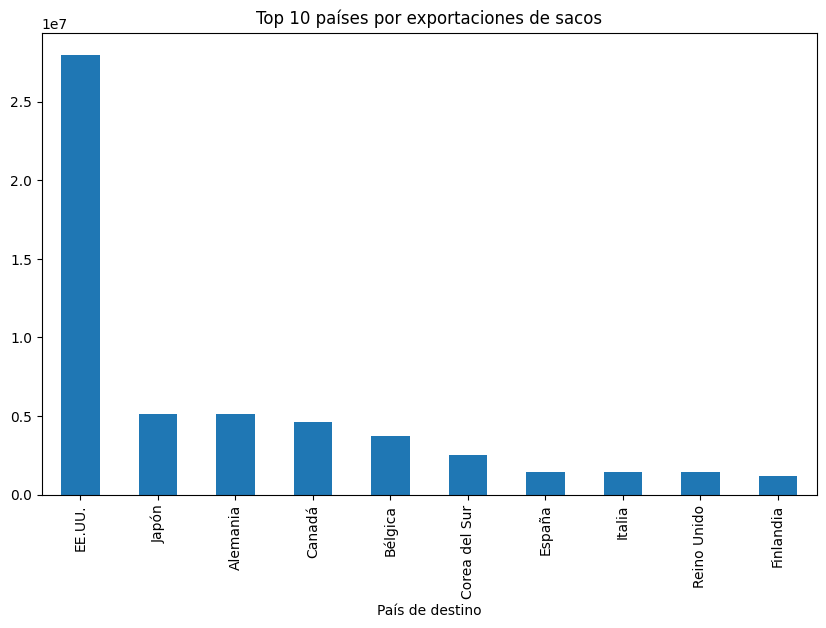

In [ ]:

df['Precio interno'] = df['Precio interno'].fillna(df['Precio interno'].mean())
df.groupby(df['Fecha'].dt.year)['Precio Interno ($/125 Kg)'].mean().plot(title='Tendencia de Precios Internos por Año', figsize=(10,6))                  # Analizar la tendencia de precios internos a lo largo del tiempo
exportaciones_por_pais = df.groupby('País de destino')['Sacos de 70 kg. equivalente real Exportados'].sum().sort_values(ascending=False)                # Análisis de exportaciones por país
print("Top países de destino por cantidad de sacos exportados:\n", exportaciones_por_pais.head(10))
exportaciones_por_pais.head(10).plot(kind='bar', title='Top 10 países por exportaciones de sacos', figsize=(10,6))

# Análisis de tendencias de precios
# Gráfica de tendencia: se utiliza una gráfica de línea para observar cómo ha cambiado el precio del café a lo largo del tiempo (usando la columna Fecha y Precio Interno).
Comparación anual: Se comparar los precios de cada 4  año con los de otros años

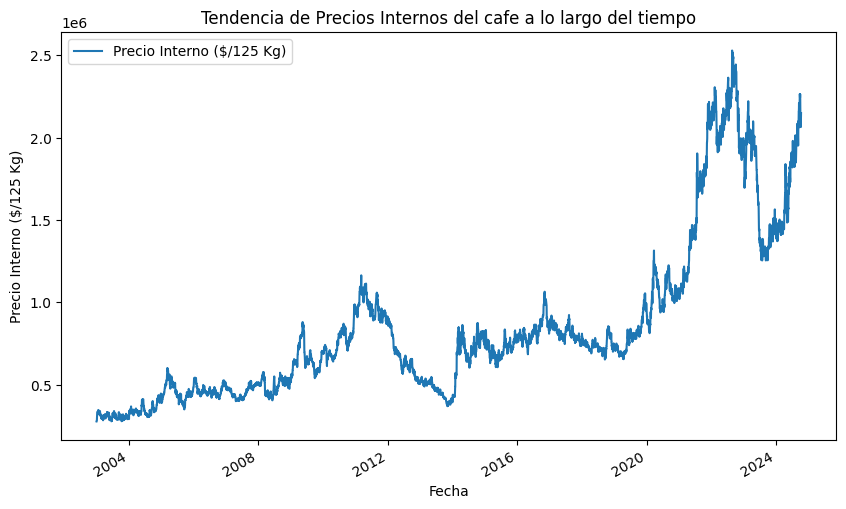

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gráfico de tendencia de precios
df.plot(x='Fecha', y='Precio Interno ($/125 Kg)', title='Tendencia de Precios Internos', figsize=(10,6))
plt.title('Tendencia de Precios Internos del cafe a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio Interno ($/125 Kg)')
plt.show()


# Análisis de exportaciones por país

#Distribución de exportaciones:  Se busca analizar la cantidad de sacos exportados a diferentes países (País de destino) usando un gráfico de barras.

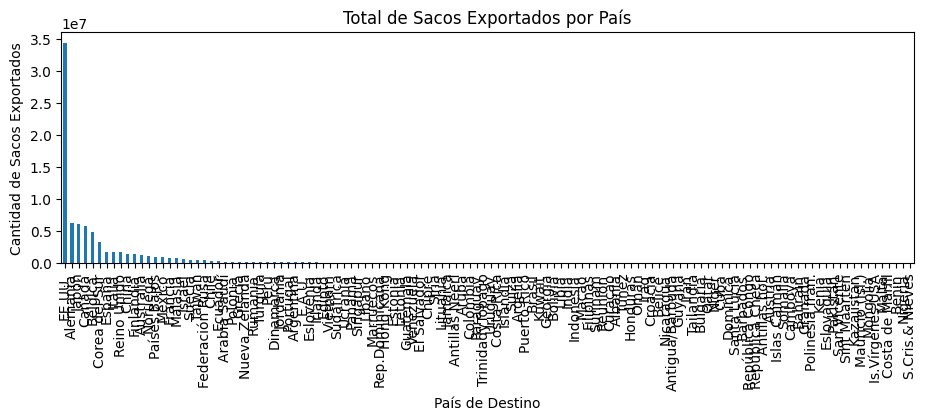

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
exportaciones_por_pais = df.groupby('País de destino')['Sacos de 70 kg. equivalente real Exportados'].sum().sort_values(ascending=False)
exportaciones_por_pais.plot(kind='bar', title='Distribución de Exportaciones por País', figsize=(11,3))
plt.title('Total de Sacos Exportados por País')
plt.xlabel('País de Destino')
plt.ylabel('Cantidad de Sacos Exportados')
plt.show()

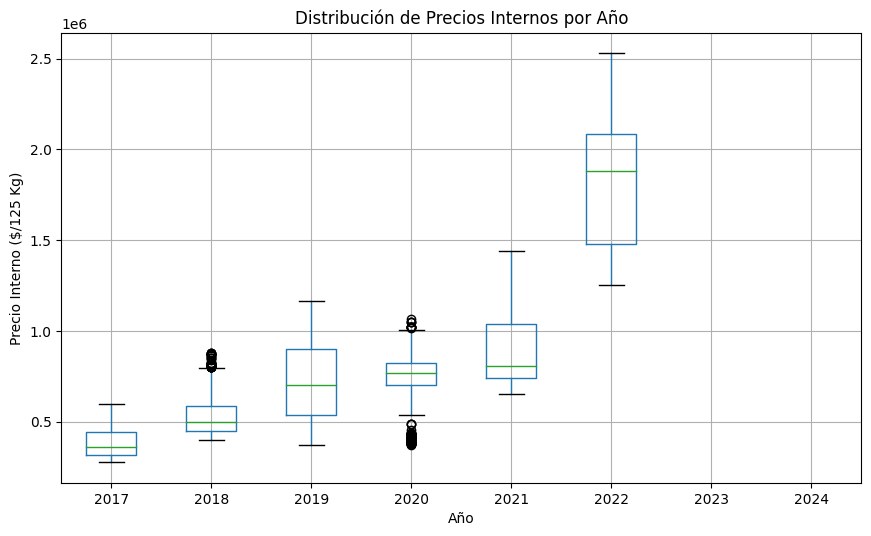

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.boxplot(column='Precio Interno ($/125 Kg)', by='Año', figsize=(10,6))
plt.title('Distribución de Precios Internos por Año')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('Precio Interno ($/125 Kg)')
plt.show()

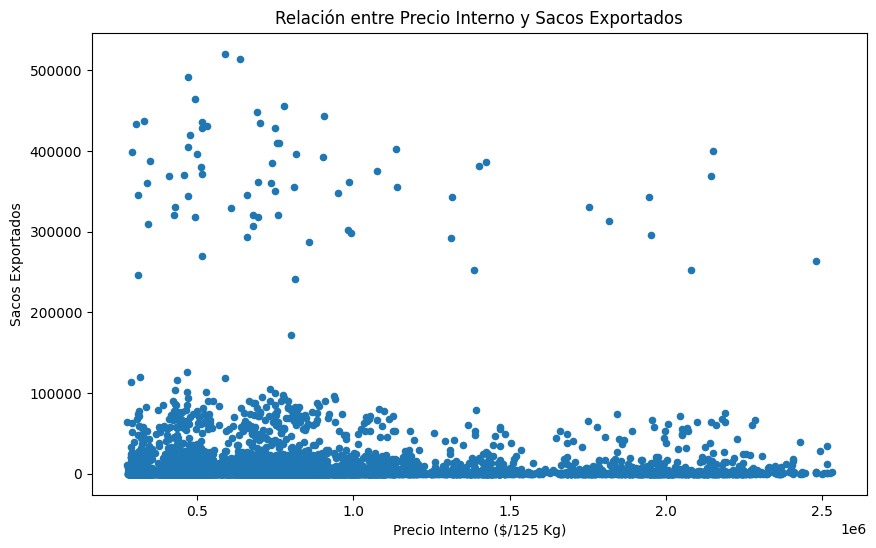

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df.plot.scatter(x='Precio Interno ($/125 Kg)', y='Sacos de 70 kg. equivalente real Exportados', figsize=(10,6))
plt.title('Relación entre Precio Interno y Sacos Exportados')
plt.xlabel('Precio Interno ($/125 Kg)')
plt.ylabel('Sacos Exportados')
plt.show()

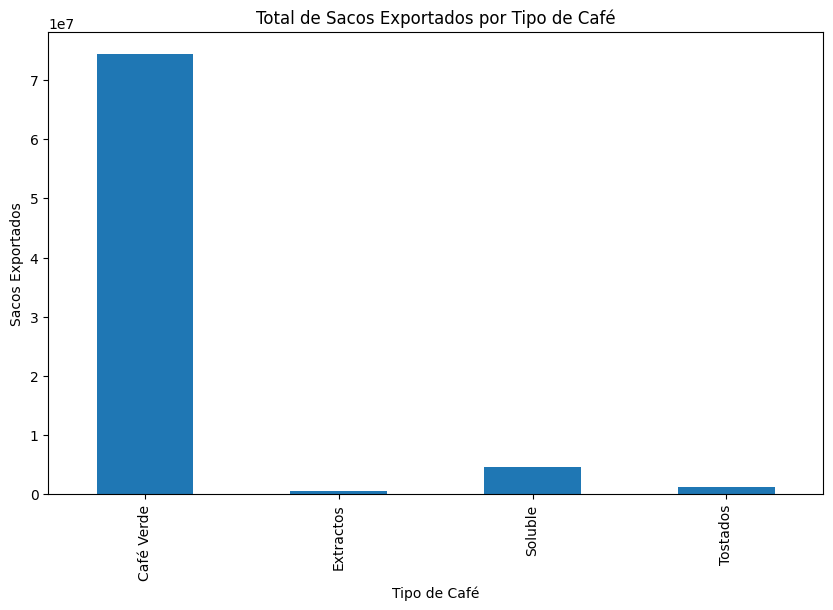

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df.groupby('Tipo de café')['Sacos de 70 kg. equivalente real Exportados'].sum().plot(kind='bar', figsize=(10,6))
plt.title('Total de Sacos Exportados por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Sacos Exportados')
plt.show()

Index([                                      'Fecha',
                         'Precio Interno ($/125 Kg)',
                                               'Mes',
                                    'Precio interno',
                                               'Año',
                                             'Mes.1',
                                   'País de destino',
                                      'Tipo de café',
       'Sacos de 70 kg. equivalente real Exportados',
                        'Sacos de 60 Kg. Exportados',
       ...
                                             '2014*',
                                             '2015*',
                                             '2016*',
                                             '2017*',
                                             '2018*',
                                             '2019*',
                                             '2020*',
                                             '2021*',
                 

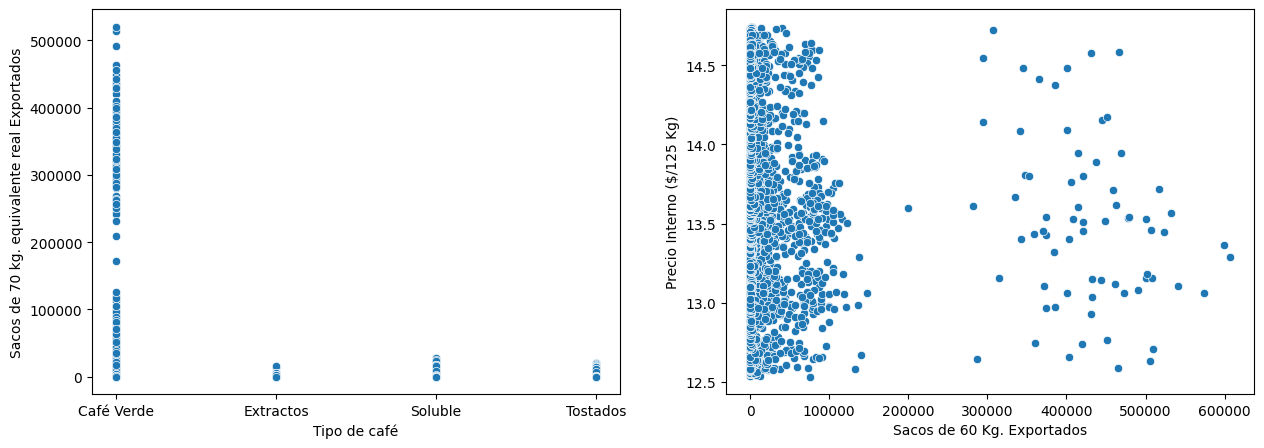

Index([                                      'Fecha',
                         'Precio Interno ($/125 Kg)',
                                               'Mes',
                                    'Precio interno',
                                               'Año',
                                             'Mes.1',
                                   'País de destino',
                                      'Tipo de café',
       'Sacos de 70 kg. equivalente real Exportados',
                        'Sacos de 60 Kg. Exportados',
       ...
                                             '2014*',
                                             '2015*',
                                             '2016*',
                                             '2017*',
                                             '2018*',
                                             '2019*',
                                             '2020*',
                                             '2021*',
                 

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])
df.columns = df.columns.str.strip()
print(df.columns)
df = df[df['Fecha'].dt.year != 1944]
df['Mes'] = df['Fecha'].dt.month
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df, x='Tipo de café', y='Sacos de 70 kg. equivalente real Exportados', ax=ax[0])
sns.scatterplot(data=df, x='Sacos de 60 Kg. Exportados', y=np.log(df['Precio Interno ($/125 Kg)']), ax=ax[1])
plt.show()
print(df.columns)
print(df.dtypes)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])
print(df.head())
media = df['Precio Interno ($/125 Kg)'].mean()
mediana = df['Precio Interno ($/125 Kg)'].median()
varianza = df['Precio Interno ($/125 Kg)'].var()
desviacion = df['Precio Interno ($/125 Kg)'].std()

print(f'Media: {media}, Mediana: {mediana}, Varianza: {varianza}, Desviación Estándar: {desviacion}')

       Fecha  Precio Interno ($/125 Kg)        Mes  Precio interno   Año  \
0 2003-01-02                   277000.0 1944-01-01            44.0  2017   
1 2003-01-03                   280875.0 1944-02-01            44.0  2017   
2 2003-01-04                   280875.0 1944-03-01            47.0  2017   
3 2003-01-05                   280875.0 1944-04-01            47.0  2017   
4 2003-01-06                   281500.0 1944-05-01            47.0  2017   

   Mes.1 País de destino Tipo de café  \
0      1        Alemania   Café Verde   
1      1        Alemania    Extractos   
2      1        Alemania      Soluble   
3      1        Alemania     Tostados   
4      1       Argentina   Café Verde   

   Sacos de 70 kg. equivalente real Exportados  Sacos de 60 Kg. Exportados  \
0                                        64522                       75275   
1                                            1                           1   
2                                         9132                

In [14]:
import pandas as pd
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])
tabla_precios = df.groupby('Año')['Precio Interno ($/125 Kg)'].agg(['mean', 'median', 'std']).reset_index()
tabla_precios.columns = ['Año', 'Media del Precio', 'Mediana del Precio', 'Desviación Estándar']
print(tabla_precios)

    Año  Media del Precio  Mediana del Precio  Desviación Estándar
0  2017      3.858687e+05            363375.0         76991.909059
1  2018      5.305114e+05            501000.0        103638.290763
2  2019      7.260036e+05            703125.0        195241.303847
3  2020      7.514410e+05            767000.0        119091.663294
4  2021      8.866444e+05            808000.0        179911.298701
5  2022      1.825060e+06           1880000.0        323694.877030
6  2023               NaN                 NaN                  NaN
7  2024               NaN                 NaN                  NaN


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])
tabla_precios = df.groupby('Año')['Precio Interno ($/125 Kg)'].agg(['mean', 'median', 'std']).reset_index()
tabla_precios.columns = ['Año', 'Media del Precio', 'Mediana del Precio', 'Desviación Estándar']
tabla_precios = tabla_precios.dropna()
print(df.columns)

Index([                                      'Fecha',
                         'Precio Interno ($/125 Kg)',
                                               'Mes',
                                    'Precio interno',
                                               'Año',
                                             'Mes.1',
                                   'País de destino',
                                      'Tipo de café',
       'Sacos de 70 kg. equivalente real Exportados',
                        'Sacos de 60 Kg. Exportados',
       ...
                                             '2014*',
                                             '2015*',
                                             '2016*',
                                             '2017*',
                                             '2018*',
                                             '2019*',
                                             '2020*',
                                             '2021*',
                 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])
print(df.columns)
df.columns = df.columns.str.strip()
print(df.columns)
print(df.isnull)


Index([                                      'Fecha',
                         'Precio Interno ($/125 Kg)',
                                               'Mes',
                                    'Precio interno',
                                               'Año',
                                             'Mes.1',
                                   'País de destino',
                                      'Tipo de café',
       'Sacos de 70 kg. equivalente real Exportados',
                        'Sacos de 60 Kg. Exportados',
       ...
                                             '2014*',
                                             '2015*',
                                             '2016*',
                                             '2017*',
                                             '2018*',
                                             '2019*',
                                             '2020*',
                                             '2021*',
                 

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])
tabla_exportaciones = df.groupby('País de destino')['Sacos de 70 kg. equivalente real Exportados'].sum().reset_index()
tabla_exportaciones = tabla_exportaciones.sort_values(by='Sacos de 70 kg. equivalente real Exportados', ascending=False)
tabla_exportaciones_top10 = tabla_exportaciones.head(10)
print(tabla_exportaciones_top10)
df.columns = df.columns.str.strip()
print(df.columns)

   País de destino  Sacos de 70 kg. equivalente real Exportados
34          EE.UU.                                     34331987
1         Alemania                                      6316573
64           Japón                                      6084399
20          Canadá                                      5753717
18         Bélgica                                      4834593
25   Corea del Sur                                      3254300
40          España                                      1784665
62          Italia                                      1768746
96     Reino Unido                                      1710674
22           China                                      1487848
Index([                                      'Fecha',
                         'Precio Interno ($/125 Kg)',
                                               'Mes',
                                    'Precio interno',
                                               'Año',
                          

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])
tabla_precios = df.groupby('Año')['Precio Interno ($/125 Kg)'].agg(['mean', 'median', 'std']).reset_index()
tabla_precios.columns = ['Año', 'Media del Precio', 'Mediana del Precio', 'Desviación Estándar']
print(tabla_precios)

    Año  Media del Precio  Mediana del Precio  Desviación Estándar
0  2017      3.858687e+05            363375.0         76991.909059
1  2018      5.305114e+05            501000.0        103638.290763
2  2019      7.260036e+05            703125.0        195241.303847
3  2020      7.514410e+05            767000.0        119091.663294
4  2021      8.866444e+05            808000.0        179911.298701
5  2022      1.825060e+06           1880000.0        323694.877030
6  2023               NaN                 NaN                  NaN
7  2024               NaN                 NaN                  NaN


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('PCAFE.xlsx', parse_dates=['Fecha'])
tabla_precios = df.groupby('Año')['Precio Interno ($/125 Kg)'].agg(['mean', 'median', 'std']).reset_index()
tabla_precios.columns = ['Año', 'Media del Precio', 'Mediana del Precio', 'Desviación Estándar']
tabla_precios['Media del Precio'] = tabla_precios['Media del Precio'].fillna(tabla_precios['Media del Precio'].mean())
tabla_precios['Mediana del Precio'] = tabla_precios['Mediana del Precio'].fillna(tabla_precios['Mediana del Precio'].median())
tabla_precios['Desviación Estándar'] = tabla_precios['Desviación Estándar'].fillna(tabla_precios['Desviación Estándar'].mean())
print(tabla_precios)

    Año  Media del Precio  Mediana del Precio  Desviación Estándar
0  2017      3.858687e+05            363375.0         76991.909059
1  2018      5.305114e+05            501000.0        103638.290763
2  2019      7.260036e+05            703125.0        195241.303847
3  2020      7.514410e+05            767000.0        119091.663294
4  2021      8.866444e+05            808000.0        179911.298701
5  2022      1.825060e+06           1880000.0        323694.877030
6  2023      8.509216e+05            735062.5        166428.223782
7  2024      8.509216e+05            735062.5        166428.223782
